#<font color = red> **Semantic Spotter: RAG Q&A System for Insurance Policies using LangChain**

- Retrieval-Augmented Generation (RAG) project called Semantic Spotter Project to answer questions from a life insurance policy documents

- Problem Statement: The goal of the project is to build a robust generative search system capable of effectively and accurately answering questions from a bunch of policy documents using LangChain framework.

- System Design Discussion and Project Layers Breakdown

    - Embedding Layer: Transform text into numerical representations(Load and preprocess PDF, Chunking strategies to test, Embedding model options, Store in VectorDB).
    - Search Layer: Retrieve relevant document chunks for a given query(Embed and search ChromaDB, Implement caching, Re-ranking step).
    - Chaining Layer - Combine retrieved context, user query, and prompt instructions into a pipeline. It defines a chain that takes a user query, retrieves relevant documents, formats them, passes them to the language model along with the original question and the RAG prompt, and then parses the model's output into a string.
    - Evaluation(optional): Measure system quality and improve iteratively.

    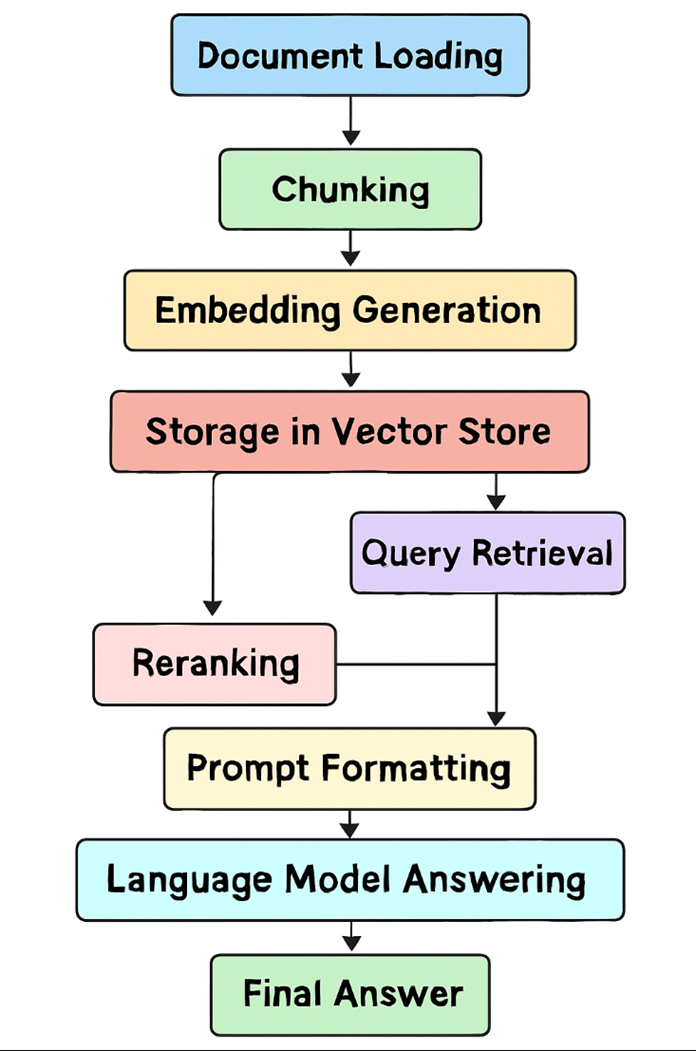


# <font color = red> **Setup**

 Install several Python libraries that are essential for building applications with Large Language Models (LLMs)

- openai: This is the official Python client library for interacting with the OpenAI API, which provides access to powerful language models like GPT-3.5 and GPT-4.
- langchain: This is the core library for the LangChain framework, which simplifies the development of LLM-powered applications by providing tools and components for chaining together different operations (like prompting, calling LLMs, and processing data).
- chromadb: A vector database that can be used to store and search vector embeddings, which are numerical representations of text that capture semantic meaning. This is useful for tasks like retrieval-augmented generation (RAG).
- faiss-cpu: A library for efficient similarity search and clustering of dense vectors. It's often used in conjunction with vector databases like ChromaDB for fast retrieval of relevant information.
- pypdf: A library for working with PDF files, allowing you to extract text and other information from them. This is useful for loading and processing document data for your LLM applications.
- tiktoken: A library from OpenAI for counting and encoding text into tokens, which are the basic units that LLMs process. This is helpful for managing token limits and understanding the cost of using different models.
- docarray: A library for representing and manipulating multimodal data, including text, images, and other types of documents. It can be used to structure and manage the data you use with LangChain.

In [1]:
!pip install -U -qq openai langchain chromadb faiss-cpu pypdf tiktoken docarray PyPDF

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 1.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.0/812.0 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 74.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 98.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.9 MB/s e

In [2]:
# Set the maximum width of the output cell
%%html
<style>
.output {
    max-width: 100% !important;
    white-space: normal !important;
}
</style>

In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


## Set the OpenAI Key

In [4]:
# Import the necessary libraies
import os
import openai
from google.colab import userdata


# Update the OpenAI API key by updating the environment variable
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

#<font color = red> **Why LangChain**?


LangChain is a framework that simplifies the development of LLM applications LangChain offers a suite of tools, components, and interfaces that simplify the construction of LLM-centric applications. LangChain enables developers to build applications that can generate creative and contextually relevant content LangChain provides an LLM class designed for interfacing with various language model providers, such as OpenAI, Cohere, and Hugging Face.

LangChain's versatility and flexibility enable seamless integration with various data sources, making it a comprehensive solution for creating advanced language model-powered applications.

LangChain's open-source framework is available to build applications in Python or JavaScript/TypeScript. Its core design principle is composition and modularity. By combining modules and components, one can quickly build complex LLM-based applications. LangChain is an open-source framework that makes it easier to build powerful and personalizeable applications with LLMs relevant to user’s interests and needs. It connects to external systems to access information required to solve complex problems. It provides abstractions for most of the functionalities needed for building an LLM application and also has integrations that can readily read and write data, reducing the development speed of the application. LangChains's framework allows for building applications that are agnostic to the underlying language model. With its ever expanding support for various LLMs, LangChain offers a unique value proposition to build applications and iterate continuosly.

LangChain framework consists of the following:
- **Components**: LangChain provides modular abstractions for the components necessary to work with language models. LangChain also has collections of implementations for all these abstractions. The components are designed to be easy to use, regardless of whether you are using the rest of the LangChain framework or not.
- **Use-Case Specific Chains**: Chains can be thought of as assembling these components in particular ways in order to best accomplish a particular use case. These are intended to be a higher level interface through which people can easily get started with a specific use case. These chains are also designed to be customizable.

The LangChain framework revolves around the following building blocks:
* Model I/O: Interface with language models (LLMs & Chat Models, Prompts, Output Parsers)
* Retrieval: Interface with application-specific data (Document loaders, Document transformers, Text embedding models, Vector stores, Retrievers)
* Chains: Construct sequences/chains of LLM calls
* Memory: Persist application state between runs of a chain
* Agents: Let chains choose which tools to use given high-level directives
* Callbacks: Log and stream intermediate steps of any chain



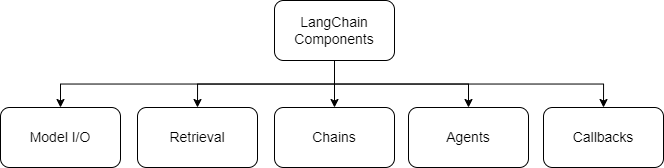

**Why LangChain?**

- Simplifies Development: LangChain provides abstractions for common functionalities needed in LLM applications, reducing development time.
- Modularity and Composition: Its core design principles of composition and modularity allow you to quickly build complex LLM applications by combining different modules and components.
- Connects to External Systems: LangChain enables applications to connect to external systems to access information required to solve complex problems.
- Model Agnostic: The framework allows for building applications that are not tied to a specific language model, offering flexibility and the ability to switch between different LLMs easily.
- Provides Building Blocks: LangChain offers essential building blocks for LLM applications, including Model I/O (interacting with models), Retrieval (interfacing with data), Chains (constructing sequences of LLM calls), Memory (persisting application state), Agents (letting chains choose tools), and Callbacks (logging and streaming).

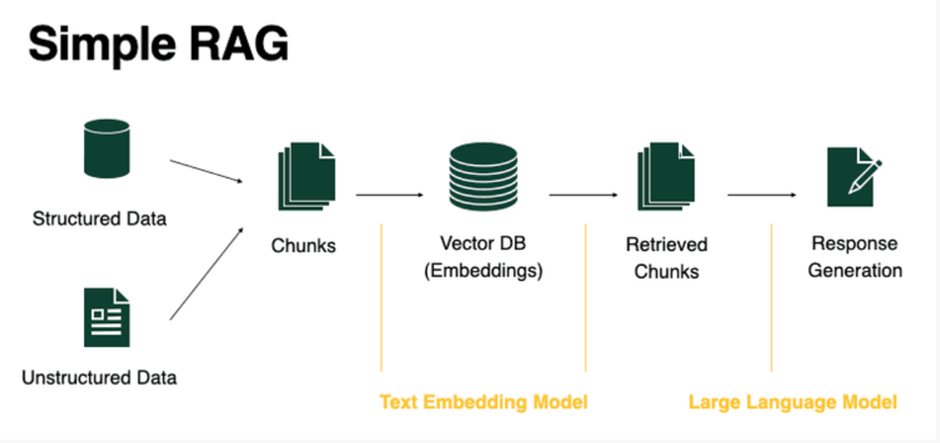
Source:- https://www.bentoml.com/blog/building-rag-with-open-source-and-custom-ai-models

References:

[LangChain Python Documentation](https://python.langchain.com/docs/get_started/introduction)

[LangChain Python API Reference](https://api.python.langchain.com/en/latest/api_reference.html)


---



# <font color = red> 1. Model I/O


LangChain's Model I/O component provides support to interface with the LLM and generate responses.
The Model I/O consists of:
* **Prompts**: Templatize, dynamically select, and manage model inputs
* **Language Models**: Make calls to language models through common interfaces
* **Output Parsers**: Extract information from model outputs

The general flow of Model I/O in LangChain is illustrated in the image below ([source](https://python.langchain.com/docs/modules/model_io/)).

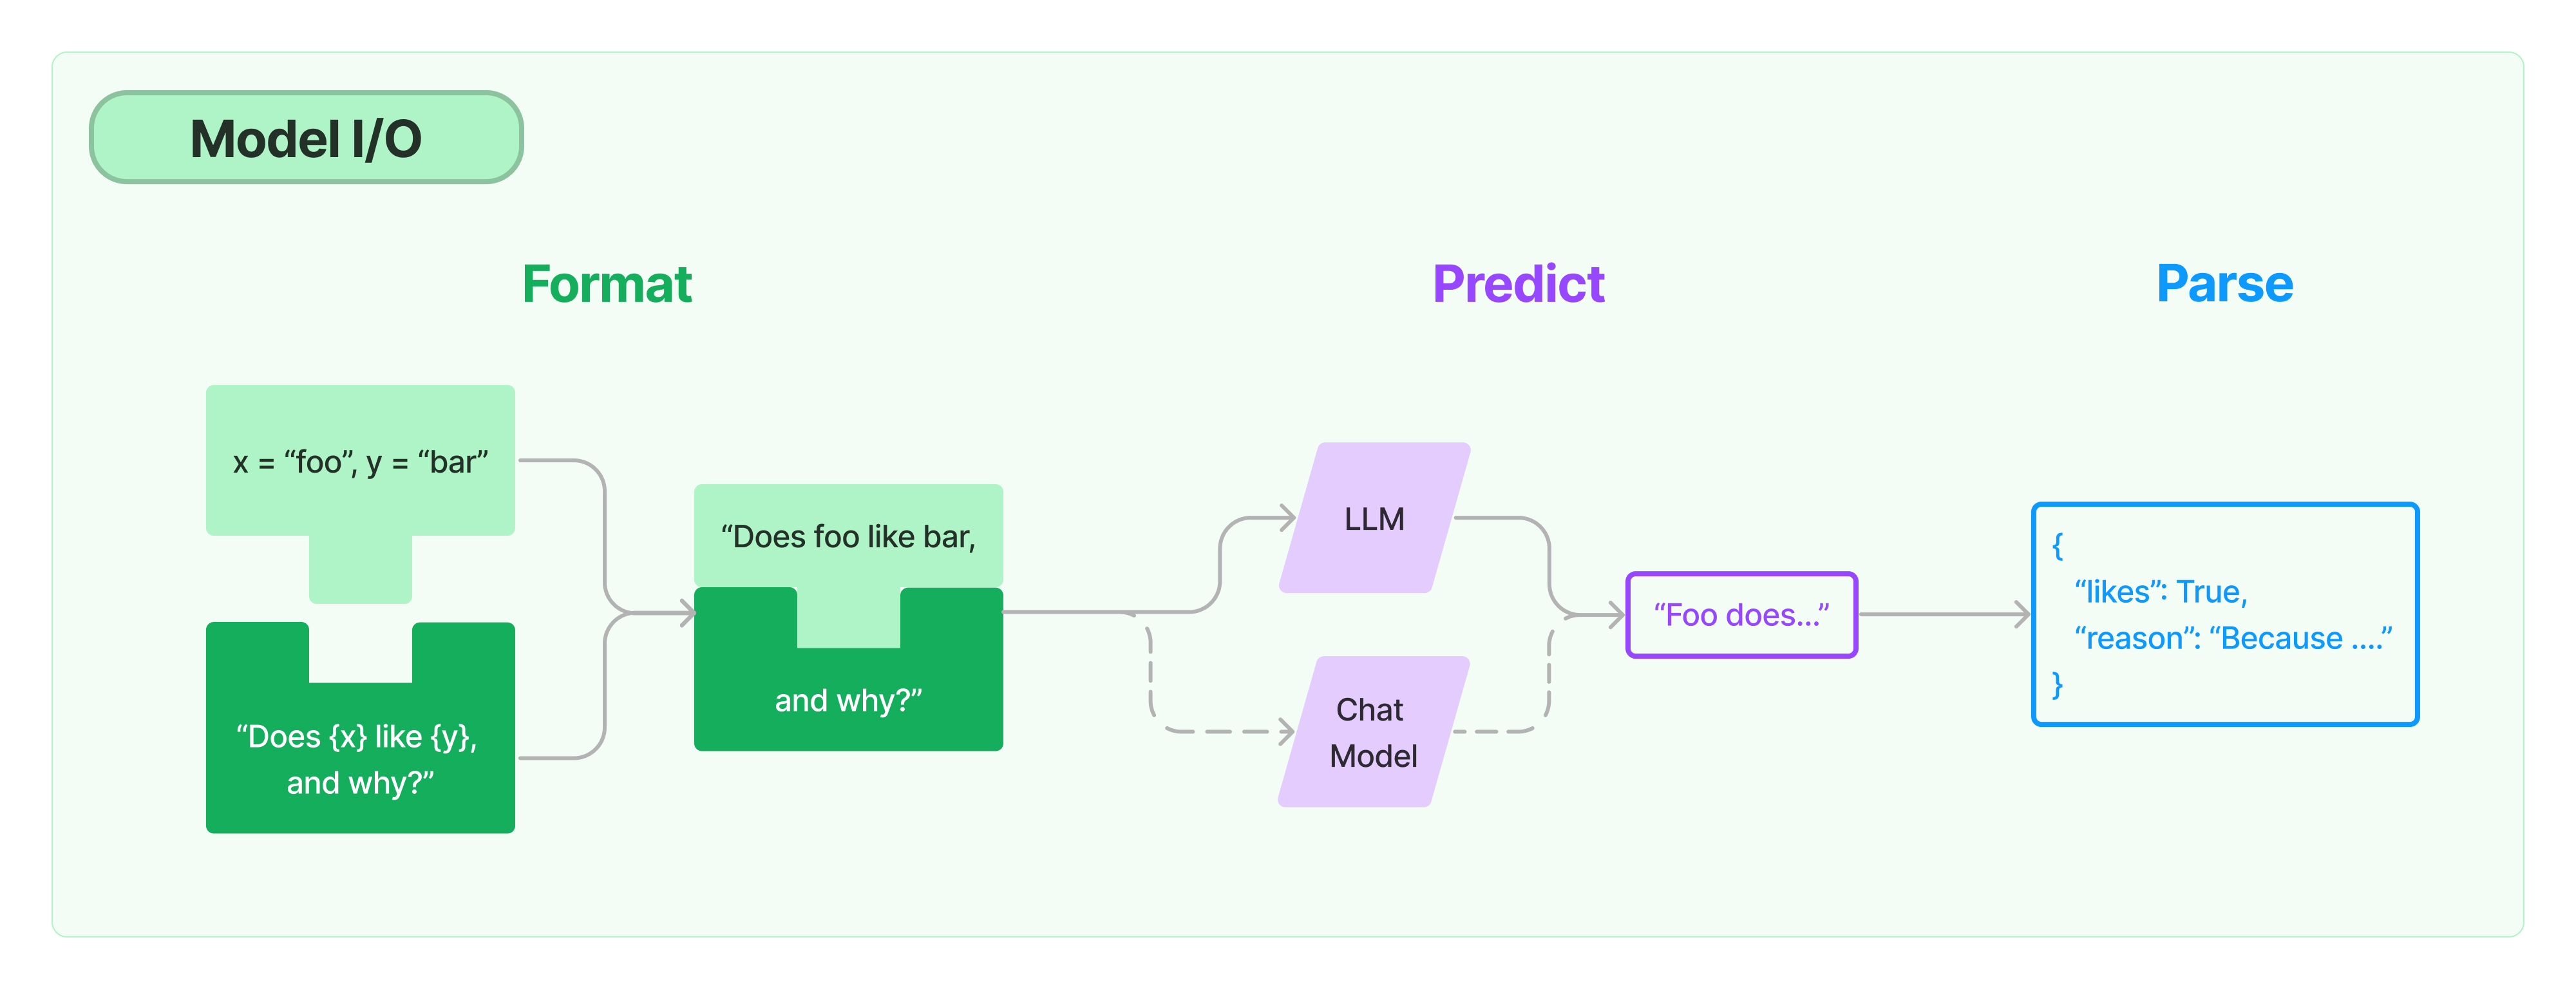

### 1.1 Model


LangChain provides an easy out-of-the box support to work with LLMs. LangChain provides interfaces and integrations for two classes of LLM models
*   **LLMs**: Models that take a text string as input and return a text string
*   **Chat models**: Models that are backed by a language model but take a list of Chat Messages as input and return a Chat Message.

LLMs and chat models are subtly but importantly different. LLMs in LangChain refer to pure `text completion models` - where a string prompt is taken as the input and the LLM outputs a string.

Chat Models are LLMs that have been tuned specifically for having turn-based conversations such as ChatGPT. Instead of a single string, they take a list of chat messages as input. Usually these models have labelled messages such as "System", "Human" and provides a AI chat message ("AI"/ "Output Response") as the output.




###  **[LLMs](https://python.langchain.com/docs/modules/model_io/models/llms/)**


The `LLM` class of LangChain is designed to provide a standard interface for all the major LLM provides such as OpenAI, Cohere, Hugging Face, etc.
LangChain provided a standard interface for interacting with many different LLMs to perform  standard text completion tasks.

This, however, has been deprecated and no longer is supported by LangChain. The text completion model is now categorised as `legacy` by OpenAI hence for the remainder of the course, we will work with OpenAI's chat model.



###  **[Chat Model](https://python.langchain.com/docs/modules/model_io/models/chat/)**

Chat models are a variation on language models. While chat models use language models under the hood, the interface they use is a bit different. Rather than using a "text in, text out" API, they use an interface where "chat messages" are the inputs and outputs.

The OpenAI chat model can be imported using the code below:
```
pip install -qU langchain-openai
from langchain_openai import ChatOpenAI
```
There are two ways to initiate the OpenAI LLM class once the necessary libraries have been imported.
If you'd prefer not to set an environment variable you can pass the key in directly via the openai_api_key named parameter when initiating the OpenAI LLM class:
```
chat = ChatOpenAI(openai_api_key="...")
```
Otherwise you can initialize without any params:
```
from langchain_openai import ChatOpenAI
chat = ChatOpenAI()
```

In [5]:
# Import the ChatOpenAI model
!pip install -qU langchain-openai
from langchain_openai import ChatOpenAI, OpenAI

# Instantiate OpenAI's Chat Model
llm_chat = ChatOpenAI() #ChatModel Class
llm  = OpenAI() # LLM Class

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 2.1 MB/s eta 0:00:00


The ChatOpenAI() can take multiple arguments. The API reference contains the complete list of arguments that can be passed to the chat model. A few important ones include:
* max_tokens
* model_name:  If not defined, the default model is `gpt-3.5-turbo`
* max_retries: If not defined, the default value is 6
* temperature: If not defined, the default value `temperature = 0.7`


In [6]:
# # Model Parameters for the ChatOpenAI object
llm_chat.model_name
# # Temperature parameters for ChatOpenAI
llm_chat.temperature

Experiment with Langchain prompts

In [7]:
# How to use Langchain to query LLM

# Passing the query as is to the chat model will result in an error message 'unknown type'
query = "Recipe for breakfast with bread and tomato"
output = llm_chat.invoke(query)

In [8]:
output

AIMessage(content='Bruschetta with Tomato and Basil\n\nIngredients:\n- 1 small baguette or loaf of bread\n- 2-3 ripe tomatoes\n- 2 cloves of garlic\n- Handful of fresh basil leaves\n- Olive oil\n- Balsamic vinegar\n- Salt and pepper\n\nInstructions:\n1. Preheat your oven to 400°F (200°C).\n2. Cut the bread into thick slices and place them on a baking sheet. Drizzle with olive oil and sprinkle with salt. Toast in the oven for 5-7 minutes or until golden brown.\n3. While the bread is toasting, dice the tomatoes and place them in a bowl.\n4. Finely chop the garlic and add it to the tomatoes. Tear the basil leaves and add them as well.\n5. Drizzle the tomato mixture with olive oil and balsamic vinegar. Season with salt and pepper, and mix well.\n6. Remove the toasted bread from the oven and top each slice with the tomato mixture.\n7. Serve immediately and enjoy your delicious bruschetta with tomato and basil!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'comple

In [9]:
output.response_metadata

{'token_usage': {'completion_tokens': 220,
  'prompt_tokens': 14,
  'total_tokens': 234,
  'completion_tokens_details': {'accepted_prediction_tokens': 0,
   'audio_tokens': 0,
   'reasoning_tokens': 0,
   'rejected_prediction_tokens': 0},
  'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}},
 'model_name': 'gpt-3.5-turbo-0125',
 'system_fingerprint': None,
 'id': 'chatcmpl-CAfY7PNFyynWHtswASav9B9s53ftM',
 'service_tier': 'default',
 'finish_reason': 'stop',
 'logprobs': None}

Input prompts to chat models need to be structured in a special format.

**Chat Messages**

Chat messages in LangChain are a way to interact with the Language Model (LLM) using a chat-like interface. They function similarly to a simple text input to the LLM, with a small change - the chat model must be supplied with message types for the various roles. **System, Human, and AI**
For more, see OpenAI's [documentation](https://platform.openai.com/docs/guides/chat/introduction)

The `langchain.schema.messages` class in LangChain provides several objects to easily distinguish between different roles:
* **SystemMessage** - System messages provide helpful background context that tells the chat model/ AI what to do.

* **HumanMessage** - A ChatMessage that represent Human messages/ intended to represent the user.

* **AIMessage** - AI messages show the chat model's (/AI) response.


The above text messages can be used with the `from langchain_openai import ChatOpenAI` library in LangChain.

Additionally, LangChain also supports messages specific to OpenAI's Function calling capability. The `FunctionMessage` represents a ChatMessage coming from a function call.

In the upcoming codes, we will exclusively use the `SystemMessage` and the `HumanMessage` for providing the system context and input/information to OpenAI's chat model.


System messages are not strictly necessary for getting the output response, they can provide helpful context for the AI for applications where a custom system message needs to be provided.

### 1.2 [Prompt Template](https://python.langchain.com/docs/modules/model_io/prompts/prompt_templates/)

PromptTemplates are a crucial component of LangChain's framework that makes constructing prompts with dynamic inputs easier.

In a traditional API, you'd write the prompt query and write a function to perform an API call. In LangChain, an LLM API call is performed by passing the prompt as a prompt template to the chat model. The PromptTemplates are pre-defined structures for different types of prompts. They serve as a starting point for creating prompts and provide a consistent structure that helps guide the language model's responses with the added benefit of in-built validation by LangChain. Prompt Templates can be optimized for diverse applications like classification, generation, question-answer, summarization, and translation prompts.

A prompt template consists of a string template. It accepts a set of parameters from the user that can be used to generate a prompt for a language model. The functionality of PromptTemplate is very similar to f-strings in Python.

**Prompt with input variables:**

LangChain provides a easy method to pass dynamic input variables to the prompt with the help of Prompt Templates.

**Steps to define the PromptTemplate:**

By using [PromptTemplates](https://python.langchain.com/docs/modules/model_io/prompts/prompt_templates/), you can formalize the process of building prompts with an object-oriented approach, add multiple parameters to prompts, build prompts with dynamic inputs, reuse great prompts hundreds of times, streamline the prompt engineering process, and provide a consistent structure that helps guide the language model’s responses. This also lets developers create model agnostic template to make it easy to reuse existing templates across different language models.

The sequence of steps in defining a PromptTemplate is:
1.   Define the structure of the prompt template: The first step in creating a Prompt Template is to define the structure of the prompt template. This includes defining the different parts of the prompt, such as instructions, context, user input, and output indicator.
2.   Define the parameters of the prompt template: Once you have defined the structure of the prompt template, you need to define the parameters of the prompt template. These are the variables that will be used to create dynamic prompts.
3. Use the Prompt Template to generate prompts with dynamic inputs: Finally, you can use the Prompt Template to generate prompts with dynamic inputs. You can pass in different values for the parameters to create different prompts.

The `langchain.prompts` class in LangChain allows two methods for easlily defining prompt templates:
1. `PromptTemplate`: Create a prompt template for a string prompt.
2. `ChatPromptTemplate`: Create a prompt template out of a list of chat messages.
Each chat message is associated with content and a role. For example, in the OpenAI Chat Completions API, these correspond to system, human or AI role.



In [10]:
# Create an instance of the OpenAI's chat model.
# OpenAI API key can be provided for authentication.
llm_chat = ChatOpenAI()

### PromptTemplate

#### Prompts:

Simple Prompt: A simple prompt query passed to the LLM as text without any input variables.

Example: `Create a snack that can be prepared in 15 minutes using the ingredients tomatoes, bread`

Prompt with input variables: A prompt query that contains variables that the user can modify.

Example: `Create a snack that can be prepared in {prep_time} using the ingredients {ingredients}`

The user now adds the `prep_time = '15 mins'` and `ingredients = 'bread, tomatoes'` when the LLM is called.

### **An added advantage of using PromptTemplate is that the same prompt can be used multiple times different sets of input variables.**

#### Experiment with Langchain - Simple Prompt





In [11]:
# Import the 'PromptTemplate' class from the 'langchain' library
from langchain.prompts import PromptTemplate

# Define a simple prompt template as a string.
simple_template = "Create a snack that can be prepared in 15 minutes using the ingredients tomatoes, bread."
simple_template

'Create a snack that can be prepared in 15 minutes using the ingredients tomatoes, bread.'

In [12]:
# Create an example prompt using the .from_template() method. In this case, there are no input variables.
# Input variables allow you to customize or parameterize prompts, but in this example, it's left empty.
simple_prompt = PromptTemplate.from_template(
    template=simple_template
    )

# Format and generate the prompt. Since there are no input variables, the prompt remains the same.
# This line is essentially preparing the prompt template for use, but no customization is applied.
simple_prompt

PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='Create a snack that can be prepared in 15 minutes using the ingredients tomatoes, bread.')

In [13]:
# Generate an input prompt using the 'simple_prompt' previously defined.
input_prompt = simple_prompt.format_prompt().to_messages()

# 'input_prompt' now contains a series of formatted messages, which are typically used for interaction with an LLM
input_prompt

[HumanMessage(content='Create a snack that can be prepared in 15 minutes using the ingredients tomatoes, bread.', additional_kwargs={}, response_metadata={})]

Notice that LangChain automatically converts the input prompt to `HumanMessage`. This prompt can now be sent to the model for generating responses or continuing a conversation.

## 1.3 Output Parsing


LangChain provides a helpful way to format the output response of a model. These parsers are especically useful when a structured output is required. LangChain's official documentation contains the list of supported output parsers [documentation](https://python.langchain.com/docs/modules/model_io/output_parsers).

Output Parsers are classes that help structure language model responses. Typically, LLMs output text as responses; however, if you want to get a more structured response than just the response text Output Parsers are effective.

**1. Format Instructions** - A autogenerated prompt that tells the LLM how to format it's response based off your desired result

**2. Parser** - A method which will extract your model's text output into a desired structure (usually json)

### Experiment with Langchain - Output Parsing


In [14]:
from langchain.output_parsers import (
    CommaSeparatedListOutputParser, # handling comma-separated lists.
    StructuredOutputParser,         # structured output parsing.
    ResponseSchema,                 # defining response data structures.
    DatetimeOutputParser            # handling date and time information.
    )

In [15]:
# View the instructions for the CommaSeparateedListOutputParser
list_parser = CommaSeparatedListOutputParser()
# Creating an instance of the CommaSeparatedListOutputParser class to handle comma-separated lists in LLM's output.
list_parser_instructions = list_parser.get_format_instructions()
# The 'list_parser_instructions' variable now holds the format instructions for the parser.
list_parser_instructions

'Your response should be a list of comma separated values, eg: `foo, bar, baz` or `foo,bar,baz`'

Let's see how the list parser works by passing a string value.

The output of the CommaSeparatedListOutputParser() is a list of values separated by commas.

In [16]:
# Defining a human-friendly template for generating a human message, including a request and format instructions.
from langchain.prompts import HumanMessagePromptTemplate, ChatPromptTemplate # Import necessary classes

human_template = '{request} {format_instructions}'

# Creating a human message prompt template from the human template.
human_prompt = HumanMessagePromptTemplate.from_template(human_template)

# Creating a chat prompt template from the human prompt.
chat_prompt = ChatPromptTemplate.from_messages([human_prompt])

# Generating a request using the chat prompt template with placeholders for 'request' and 'format_instructions'.
# Converting the request into a set of messages for interaction with a language model.
request = chat_prompt.format_prompt(request="Give me 5 dishes that can be made with onions.",
                   format_instructions = list_parser.get_format_instructions()).to_messages()
request

[HumanMessage(content='Give me 5 dishes that can be made with onions. Your response should be a list of comma separated values, eg: `foo, bar, baz` or `foo,bar,baz`', additional_kwargs={}, response_metadata={})]

In [17]:
# The 'final_request' variable now holds the formatted request as a message.
result = llm_chat(request)
result.content

/tmp/ipython-input-2422784162.py:2: LangChainDeprecationWarning: The method `BaseChatModel.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  result = llm_chat(request)


'French onion soup, caramelized onions, onion rings, onion quiche, onion tart'

The LLM's response is in the text format. We will now parse the response into a list format using the list parser.

In [18]:
list_parser.parse(result.content)

['French onion soup',
 'caramelized onions',
 'onion rings',
 'onion quiche',
 'onion tart']

So far you've explored the capabilities of LangChain for working with models, prompts and output parsers.

Let's try to replicate some of the codes that you've come across in the previous modules.

In ShopAssist AI, you were introduced to the `product_map_layer` which mapped the product description according to the user's specification in the desired format. Let's see how that can be done in LangChain.

# <font color = red> 2. Data Connections and Retrieval

In addition to making API calls easier, LangChain also provides various methods to work with external documents efficiently.

Many LLM applications require user-specific data that is not part of the model's training set. The primary way of accomplishing this is through Retrieval Augmented Generation (RAG). In this process, external data is retrieved and then passed to the LLM when doing the generation step.

LangChain provides all the building blocks for RAG applications - from simple to complex. This section of the documentation covers everything related to the retrieval step - e.g. the fetching of the data. Although this sounds simple, it can be subtly complex. This encompasses several key modules.

The following methods provided by LangChain help process documents efficiently:
* Document Loaders
* Text Splitters
* Text Embedding
* Vector Stores
* Retrievers

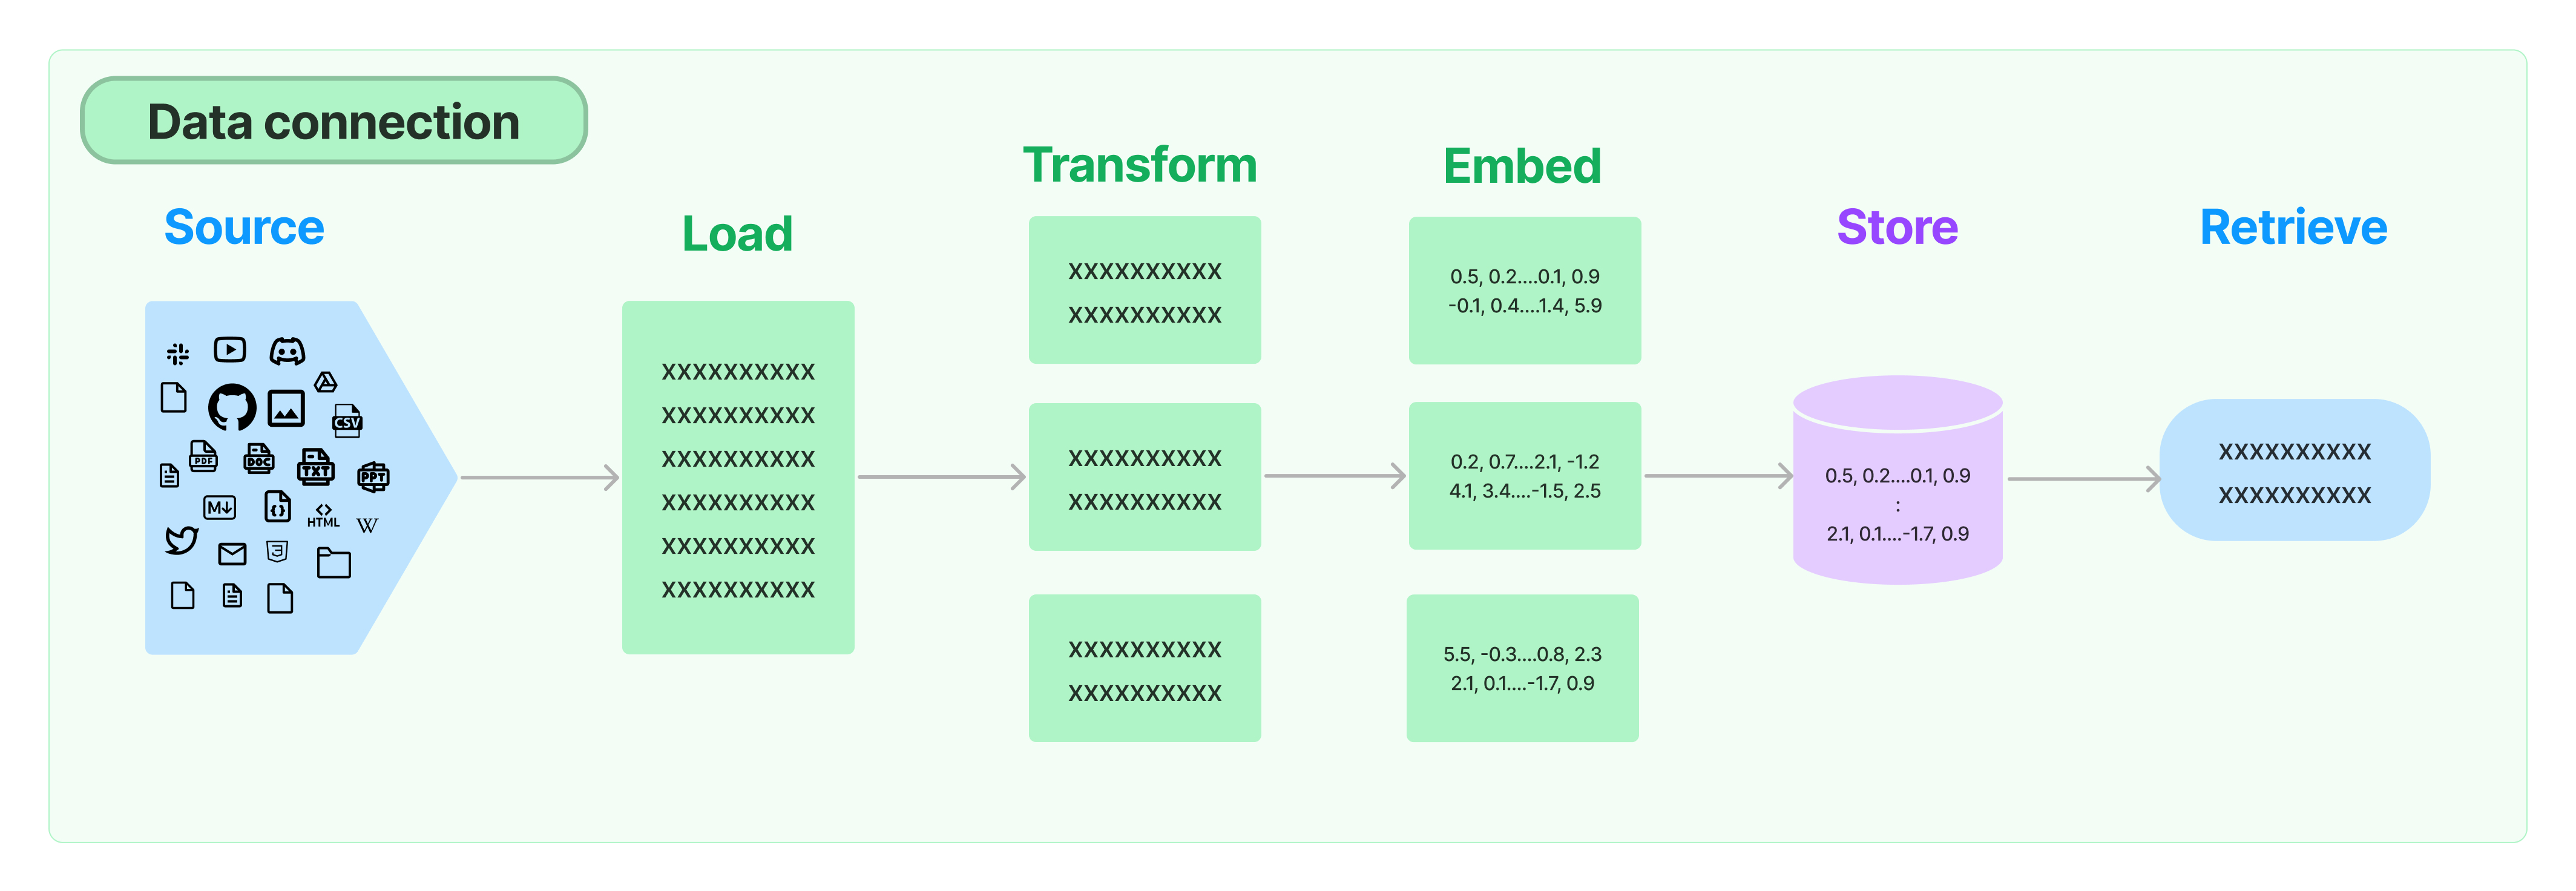

### **[Document Loaders](https://python.langchain.com/docs/modules/data_connection/document_loaders/)**


Document loaders provide an easy method to import data from different sources or formats as a DOcument, which contains the text content and the associated metadata.

Document Loaders load documents from different sources like HTML, PDF, text, etc., from various locations like cloud storage buckets and public websites. LangChain provides over 100 different document loaders as well as integrations with other major providers in the space, like AirByte and Unstructured. Refer to the official documentation for the complete list of supported [document loaders](https://api.python.langchain.com/en/latest/api_reference.html#module-langchain.document_loaders) in the API reference and the [official documentation](https://python.langchain.com/docs/integrations/document_loaders).

It should be noted that some document loaders require the associated libraries to be installed.


Document Schema:

LangChain defines a schema specially for working with Documents.  A Document is a piece of text and associated metadata. For example, there are document loaders for loading a simple .txt file, for loading the text contents of any web page, or even for loading a transcript of a YouTube video.


Document loaders provide a "load" method for loading data as documents from a configured source. They optionally implement a "lazy load" as well for lazily loading data into memory.

In [19]:
# Get files in directory

# Files are available at URL - https://github.com/Saurabh4Dev/SemanticSpotter/tree/main/data
os.chdir('/content/drive/MyDrive/SemanticSpotterProjectFiles/Data')

In [20]:
# Show directory contents
!ls

 chroma_insurance
 HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-Pay.pdf
 HDFC-Life-Group-Poorna-Suraksha-101N137V02-Policy-Document.pdf
 HDFC-Life-Group-Term-Life-Policy.pdf
'HDFC-Life-Sampoorna-Jeevan-101N158V04-Policy-Document (1).pdf'
 HDFC-Life-Sanchay-Plus-Life-Long-Income-Option-101N134V19-Policy-Document.pdf
 HDFC-Life-Smart-Pension-Plan-Policy-Document-Online.pdf
 HDFC-Surgicare-Plan-101N043V01.pdf


PDF Documents

Langchain can load and parse PDF documents using various pdf connectors. We will see the PyPDFLoader to load documents into an array of documents. The document loader requires the python package of `pypdf` to be installed.

Each document contains the page content and metadata with the associated page number.

An added advantage of using PyPDFLoader is that the documents can be retrieved with page numbers.


In [21]:
# Install the necessary library for working with PyPDFLoader
!pip install PyPDF

In [22]:
# Single document can be picked from directory

!pip install -U -qq langchain-community
# Import the PyPDFLoader class from LangChain
from langchain_community.document_loaders import PyPDFLoader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 444.0/444.0 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


Experiment with Single PDF file

In [23]:
# Read the PDF data
pdf_loader = PyPDFLoader('HDFC-Life-Group-Term-Life-Policy.pdf')
# pages = pdf_loader.load()
pages = pdf_loader.load_and_split()
# type(pages)
print(pages[0].page_content)

F&U dated 15th October 2022                  UIN-101N169V02  P a g e  | 0                        
 
 
 
 
 
   HDFC Life Group Term Life 
 
OF 
 
 
«OWNERNAME» 
 
 
 
 
 
  
Based on the Proposal and the declarations and 
any 
statement made or referred to therein, 
We will pay the Benefits mentioned in this Policy 
subject to the terms and conditions contained 
herein 
 
 
 
 
 
 
<< Designation of the Authorised Signatory >>


Langchain also has loaders with specific functionality such as the document loader for Hacker News, which allows users to pull page data and comments from the social news website.

In [24]:
# print details and first 100 lines from docucment
for doc in pages:
    print(f"Source: {doc.metadata['source']}")
    print(f"Page Number: {doc.metadata['page']}")
    print(f"Content: {doc.page_content[:100]}...")  # Displaying the first 100 characters

Source: HDFC-Life-Group-Term-Life-Policy.pdf
Page Number: 0
Content: F&U dated 15th October 2022                  UIN-101N169V02  P a g e  | 0                        
 
...
Source: HDFC-Life-Group-Term-Life-Policy.pdf
Page Number: 1
Content: F&U dated 15th October 2022                  UIN-101N169V02  P a g e  | 1                        
 
...
Source: HDFC-Life-Group-Term-Life-Policy.pdf
Page Number: 2
Content: F&U dated 15th October 2022                  UIN-101N169V02  P a g e  | 2                        
 
...
Source: HDFC-Life-Group-Term-Life-Policy.pdf
Page Number: 3
Content: F&U dated 15th October 2022                  UIN-101N169V02  P a g e  | 3                        
 
...
Source: HDFC-Life-Group-Term-Life-Policy.pdf
Page Number: 4
Content: F&U dated 15th October 2022                  UIN-101N169V02  P a g e  | 4                        
 
...
Source: HDFC-Life-Group-Term-Life-Policy.pdf
Page Number: 5
Content: F&U dated 15th October 2022                  UIN-101N169V02  P a g

Loading multiple insurance document from dorectory using PyPDFDirectoryLoader

In [25]:
# Multiple document can be picked from dorectory using PyPDFDirectoryLoader

# import the PyPDFLoader class from LangChain
from langchain_community.document_loaders import PyPDFDirectoryLoader

# Read the insurance documents from directory
pdf_directory_loader = PyPDFDirectoryLoader('/content/drive/MyDrive/SemanticSpotterProjectFiles/Data')

documents = pdf_directory_loader.load()

In [26]:
# print details and first 100 lines from each docucment
for doc in documents:
    print(f"Source: {doc.metadata['source']}")
    print(f"Page Number: {doc.metadata['page']}")
    print(f"Content: {doc.page_content[:100]}...")  # Displaying the first 100 characters

Source: /content/drive/MyDrive/SemanticSpotterProjectFiles/Data/HDFC-Life-Group-Poorna-Suraksha-101N137V02-Policy-Document.pdf
Page Number: 0
Content: Page 1 of 31 
 
Part A 
<<Date>> 
<<Master Policyholder’s Name>>  
<< Master Policyholder’s Address>...
Source: /content/drive/MyDrive/SemanticSpotterProjectFiles/Data/HDFC-Life-Group-Poorna-Suraksha-101N137V02-Policy-Document.pdf
Page Number: 1
Content: Page 2 of 31 
 
MASTER POLICY DOCUMENT- HDFC Life Group Poorna Suraksha 
 
Unique Identification Num...
Source: /content/drive/MyDrive/SemanticSpotterProjectFiles/Data/HDFC-Life-Group-Poorna-Suraksha-101N137V02-Policy-Document.pdf
Page Number: 2
Content: Page 3 of 31 
 
POLICY SCHEDULE   
1. Master Policy Number:<< system/operations generated>> 
2. Date...
Source: /content/drive/MyDrive/SemanticSpotterProjectFiles/Data/HDFC-Life-Group-Poorna-Suraksha-101N137V02-Policy-Document.pdf
Page Number: 3
Content: Page 4 of 31 
 
 
Part B  
Definitions 
The following capitalized terms wherever use

### **Document Transformers/ Text Splitters**
Often times your document is too long (like a book) for your LLM. You need to split it up into chunks. Text splitters help with this.

There are many ways you could split your text into chunks, experiment with [different ones](https://python.langchain.com/en/latest/modules/indexes/text_splitters.html) to see which is best for you.

LangChain offers different text splitters for splitting the data such as:
* Split by Character
* Recursive Splitter
* Token Splitter

**Split by Character** - This is the simplest method. This splits based on characters (by default "\n\n") and measure chunk length by number of characters.
* How the text is split: by single character.
* How the chunk size is measured: by number of characters.

---
**Recursive Text Splitter** - This text splitter is the recommended one for generic text. It is parameterized by a list of characters. It tries to split on them in order until the chunks are small enough. The default list is ["\n\n", "\n", " ", ""]. This has the effect of trying to keep all paragraphs (and then sentences, and then words) together as long as possible, as those would generically seem to be the strongest semantically related pieces of text.
* How the text is split: by list of characters.
* How the chunk size is measured: by number of characters.
---
**Split by tokens** - Language models have a token limit. You should not exceed the token limit. When you split your text into chunks it is therefore a good idea to count the number of tokens. There are many tokenizers. When you count tokens in your text you should use the same tokenizer as used in the language model.

In [27]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

# Initialize the RecursiveCharacterTextSplitter (customize chunk size and overlap as needed) - providing overlap of 20%
recursive_text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)

splits = recursive_text_splitter.split_documents(documents)

In [28]:
# print a sample chunk
print(splits[5])

page_content='Page 3 of 31 
 
POLICY SCHEDULE   
1. Master Policy Number:<< system/operations generated>> 
2. Date of Proposal:<<<< system/operations generated>> 
3. Date of Inception: <<Date of Inception>> 
4. Effective Date:<< system/operations service generated>> 
5. Master Policyholder:<<Name of Company/Group>> 
6. Name of the Scheme:<<NAME of Scheme>> 
7. Scheme Type:<<Compulsory/Voluntary>> 
8. Plan option:<<Name of Plan option>> 
9. Eligibility to join the Scheme for the Scheme Member: 
 
Eligibility Age (Last Birthday) (in years) 
Minimum Age at Entry  < 18 > 
Maximum Age at Entry Single Premium Payment Life Option  <79 > 
Extra Life Option & 
Accelerated Critical Illness 
Option   
<74> 
 Limited Premium 
Payment 
Life Option  <74 > 
Extra Life Option & Accelerated 
Critical Illness Option   
<69> 
 Regular Premium 
Payment 
Life Option  <78 > 
Extra Life Option & Accelerated 
Critical Illness Option   
<73> 
Minimum Maturity Age <18> 
Maximum Maturity Age Life Option   <80>' 

In [29]:
print ("Text Preview:") # Preview the split texts and the character count
print (splits[0].page_content,"-", len(splits[0].page_content), "\n")
print (splits[1].page_content,"-", len(splits[1].page_content), "\n")
print (splits[2].page_content,"-", len(splits[2].page_content), "\n")
print (splits[3].page_content,"-", len(splits[3].page_content), "\n")
print (splits[4].page_content,"-", len(splits[4].page_content), "\n")

Text Preview:
Page 1 of 31 
 
Part A 
<<Date>> 
<<Master Policyholder’s Name>>  
<< Master Policyholder’s Address>> 
<< Master Policyholder’s Contact Number>> 
 
Dear << Master Policyholder’s Name>>,   
 
Sub: Your Policy no. <<>> 
 
We are glad to inform you that your proposal has been accepted and the HDFC Life Group Poorna Suraksha Policy 
(“Master Policy”) being this Policy, has been issued. We have made every effort to design your Master Policy 
Document in a simple format. We have highlighted items of importance so that you may recognize them easily. 
 
Cancellation in the Free-Look Period: 
In case you are not agreeable to any of the provisions stated in the Master Policy, you have the option to return the 
Master Policy to us stating the reasons thereof, within 15 days (or 30 days in case the Master Policy has been issued 
through distance marketing mode) from the date of receipt of the Master Policy. Provided the Scheme Member(s) - 938 

through distance marketing mode) from t

RecursiveCharacterTextSplitter is generally preferred for working with generic texts as it recursively tries to split the text in order until the chunks are small enough. The default list is `["\n\n", "\n", " ", ""]`

In [30]:
print (f"You have {len(splits)} documents")

You have 760 documents


### [Text Embedding Models](https://python.langchain.com/docs/modules/data_connection/text_embedding/)

The Embeddings class is a class designed for interfacing with text embedding models. LangChain provides support for most of the embedding model providers (OpenAI, Cohere) including sentence transformers library from Hugging Face.

Embeddings create a vector representation of a piece of text and supports all the operations such as similarity search, text comparison, sentiment analysis etc.

The base Embeddings class in LangChain provides two methods: one for embedding documents and one for embedding a query.

The first method takes as input multiple texts, while the second method returns the embedding representation for a single text.


In [31]:
# Installing tiktoken library for working with OpenAI's embedding model
# LangChain uses the tiktoken library behind the scenes to:
# - Calculate the number of tokens in your input text before sending it to the OpenAI API (for purposes like checking against token limits).
# - Handle the encoding and decoding of text to and from tokens as required by the OpenAI models.

!pip install tiktoken

In [32]:
!pip install langchain_openai
# Import the OpenAI Embeddings class from LangChain
from langchain_openai import OpenAIEmbeddings
from google.colab import userdata

embeddings_model = OpenAIEmbeddings(api_key=userdata.get('OPENAI_API_KEY'))

Experimentation with Embeddings

In [33]:
# Experimentation with Embeddings
# Generate a numerical representation (an embedding) of the text content from the first split document

embeddings = embeddings_model.embed_documents([splits[0].page_content])
len(embeddings), len(embeddings[0])

(1, 1536)

In [34]:
type(embeddings)

list

### Vector Stores

One of the most common ways to store and search over unstructured data is to embed it and store the resulting embedding vectors, and then at query time to embed the unstructured query and retrieve the embedding vectors that are 'most similar' to the embedded query. A vector store takes care of storing embedded data and performing vector search for you.

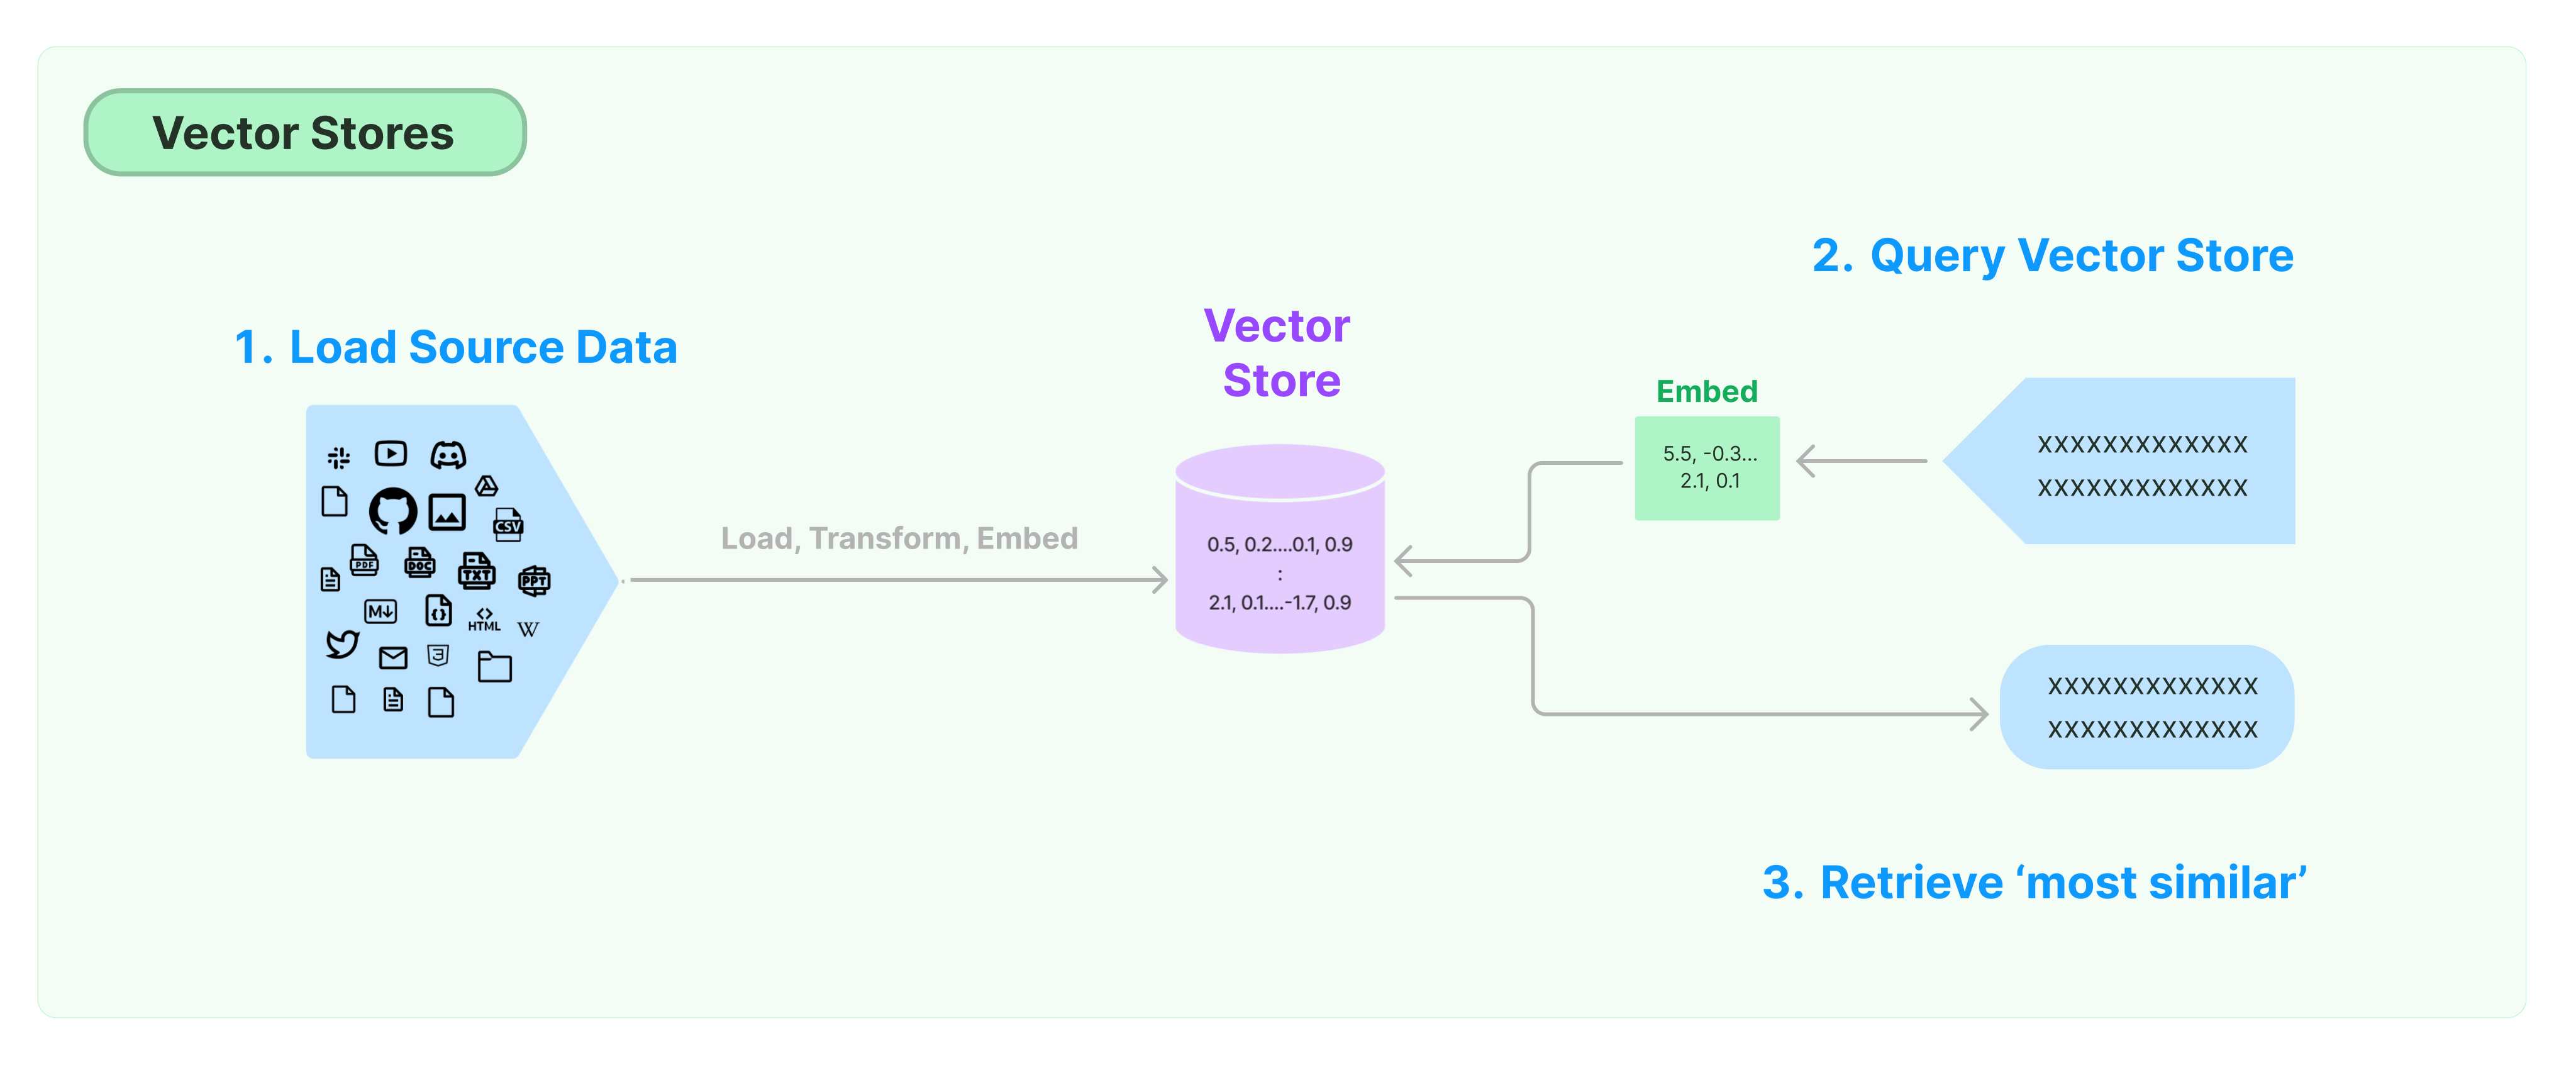

In [35]:
from langchain_community.vectorstores import Chroma
# Initialize OpenAIEmbeddings - open api key will be picked from environment
openai_embeddings = OpenAIEmbeddings()

In [36]:
from langchain.vectorstores import Chroma
# Initialize OpenAIEmbeddings - open api key will be picked from environement
openai_embeddings = OpenAIEmbeddings()

In [37]:
# creating a cache backed embeddings
from langchain.storage import InMemoryStore
from langchain.embeddings import CacheBackedEmbeddings

cache_store = InMemoryStore()
cached_embeddings = CacheBackedEmbeddings.from_bytes_store(
    openai_embeddings,
    cache_store,
    namespace="embeddings_namespace"
)

/usr/local/lib/python3.12/dist-packages/langchain/embeddings/cache.py:58: UserWarning: Using default key encoder: SHA-1 is *not* collision-resistant. While acceptable for most cache scenarios, a motivated attacker can craft two different payloads that map to the same cache key. If that risk matters in your environment, supply a stronger encoder (e.g. SHA-256 or BLAKE2) via the `key_encoder` argument. If you change the key encoder, consider also creating a new cache, to avoid (the potential for) collisions with existing keys.
  _warn_about_sha1_encoder()


In [39]:
# Create a persistent ChromaDB instance with OpenAI embeddings
db = Chroma.from_documents(
    documents = splits,
    embedding = cached_embeddings,
    persist_directory="./chroma_insurance1"  # Set a directory for persistent storage
)




**Inference:**

- Instead of cached_embeddings, if OpenAIEmbeddings() is used, every time a new Chroma instance is created,
 the OpenAIEmbeddings() object will directly call the OpenAI API to generate embeddings for all the documents in your splits list.
- How to use OpenAIEmbeddings=> db = Chroma.from_documents(
    documents=splits,
    embedding=OpenAIEmbeddings(),
    persist_directory="./chroma_insurance"
)

- Using cached_embeddings is better and efficient while running  notebook or parts of your code multiple times
 with the same set of documents.
Cost Savings,Speed Improvement, Reduced API Usage.
CacheBackedEmbeddings instance (cached_embeddings) wraps the original OpenAIEmbeddings() uses an InMemoryStore as a cache.

** How CacheBackedEmbeddings works**:

1. When cached_embeddings is asked to embed a document, it first checks its internal cache to see if it has already generated and stored an embedding for that specific document content.
2. If a cached embedding is found, it returns the cached embedding immediately.
3. If no cached embedding is found for that document, it calls the underlying OpenAIEmbeddings() object to generate the embedding from the OpenAI API.
4. Once the embedding is generated by the OpenAI API, it is stored in the cache before being returned.

Perform Similarity Search

In [40]:
# the default distance metric is cosine similarity.

def search_similarity(query):
    return db.similarity_search(query)

docs =  search_similarity("what is the life insurance coverage for death?")
print(docs[0])

page_content='Page 7 of 31 
 
Part C 
1. Benefits: 
 
(1) Benefits on Death or diagnosis of contingency covered –  
 
Plan Option Events Benefit 
Life Death In the event of the death of the Scheme Member, the 
benefit payable shall be the Sum Assured.  
Extra Life Option Death In the event of the death of the Scheme Member, the 
benefit payable shall be the Sum Assured. 
Accidental Death In event of the Scheme Member’s death due to 
Accident, an additional death benefit equal to the Sum 
Assured will be payable. 
This is in addition to the death benefit mentioned 
above  
Accelerated Critical Illness 
Option 
 
Death In the event of the death of the Scheme Member, the 
benefit payable shall be the Sum Assured. 
Diagnosis of a 
Critical Illness 
In the event of Scheme Member being diagnosed with 
any of the covered Critical Illnesses during the Policy 
Term, the benefit payable shall be the Sum Assured 
and the policy will terminate.' metadata={'moddate': '2022-01-20T07:02:14+00:00', 't

LangChain also support all major vector stores and databases such as FAISS, ElasticSearch, LanceDB, Milvus, Pinecone etc. Refer to the [API documentation](https://api.python.langchain.com/en/latest/api_reference.html#module-langchain.vectorstores) for the complete list.

### **Retrievers**
Retrievers provide Easy way to combine documents with language models.


A retriever is an interface that returns documents given an unstructured query. It is more general than a vector store. A retriever does not need to be able to store documents, only to return (or retrieve) them. Retriever stores data for it to be queried by a language model. It provides an interface that will return documents based on an unstructured query. Vector stores can be used as the backbone of a retriever, but there are other types of retrievers as well.



There are many different types of retrievers, the most widely supported is the VectoreStoreRetriever.

The [official documentation](https://python.langchain.com/docs/integrations/retrievers/) and [API reference](https://api.python.langchain.com/en/latest/api_reference.html#module-langchain.retrievers) contains a list of retriever integrations supported by LangChan.

In [41]:
# Combines a base retriever with a document compressor to improve the quality of retrieved documents.
from langchain.retrievers import ContextualCompressionRetriever
# This is a compressor that uses a cross-encoder model to re-score and reorder
# the initial set of retrieved documents.
from langchain.retrievers.document_compressors import CrossEncoderReranker
# This class allows you to load and use cross-encoder models from the Hugging Face Hub.
from langchain_community.cross_encoders import HuggingFaceCrossEncoder

# Initialize a document retriever using the existing vector storage (db).
# The retriever is configured to retrieve a top 20 documents with  mmr score more than 0.8 with cross encoding enabled

def get_retriever(topk):
    search_kwargs={"k": topk, "score_threshold": 0.8}
    # mmr: Specifies the search type as Maximum Marginal Relevance (MMR) which aims to select documents
    # that are both relevant to the query and diverse, reducing redundancy in the retrieved set.

    # search_kwargs:  Applies the defined search parameters.
    retriever = db.as_retriever(search_type="mmr", search_kwargs=search_kwargs)

    # Initialize cross-encoder model.
    # Cross-encoders are powerful models that take a query and a document pair and
    # output a relevance score, which is often more accurate than the similarity scores
    # from the initial embedding search.
    cross_encoder = HuggingFaceCrossEncoder(model_name="BAAI/bge-reranker-base")

    # Set up reranker
    # It will re-score the initially retrieved documents and
    # keep the top top_n most relevant ones according to the cross-encoder's score.
    reranker = CrossEncoderReranker(model=cross_encoder, top_n=20)
    return ContextualCompressionRetriever(base_compressor=reranker, base_retriever=retriever)



# Combine retriever and reranker
def get_topk_relevant_documents(query, topk):
    retriever = get_retriever(topk)
    relevant_docs = retriever.invoke(query)
    return relevant_docs

In [42]:
retriever_docs = get_topk_relevant_documents("what is the life insurance coverage for death?", 50)

config.json:   0%|          | 0.00/799 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/279 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

In [43]:
# extracting page content for evaluation
retriever_docs[0].page_content

'Page 7 of 31 \n \nPart C \n1. Benefits: \n \n(1) Benefits on Death or diagnosis of contingency covered –  \n \nPlan Option Events Benefit \nLife Death In the event of the death of the Scheme Member, the \nbenefit payable shall be the Sum Assured.  \nExtra Life Option Death In the event of the death of the Scheme Member, the \nbenefit payable shall be the Sum Assured. \nAccidental Death In event of the Scheme Member’s death due to \nAccident, an additional death benefit equal to the Sum \nAssured will be payable. \nThis is in addition to the death benefit mentioned \nabove  \nAccelerated Critical Illness \nOption \n \nDeath In the event of the death of the Scheme Member, the \nbenefit payable shall be the Sum Assured. \nDiagnosis of a \nCritical Illness \nIn the event of Scheme Member being diagnosed with \nany of the covered Critical Illnesses during the Policy \nTerm, the benefit payable shall be the Sum Assured \nand the policy will terminate.'

In [44]:
len(retriever_docs)

20

In [45]:
retriever_docs1 = get_topk_relevant_documents("what is the minimum age for doing a term insurance?", 50)

In [46]:
# extracting page content for evaluation
retriever_docs1[0].page_content

'<69> \n Regular Premium \nPayment \nLife Option  <78 > \nExtra Life Option & Accelerated \nCritical Illness Option   \n<73> \nMinimum Maturity Age <18> \nMaximum Maturity Age Life Option   <80> \nExtra Life Option & Accelerated Critical Illness Option   <75> \n \n \n10. Minimum Number of Members: <<5>> \n11. Mode / Frequency of Premium Payment:<<Single/Limited/Regular>> <<Annual / Half-Yearly / \nMonthly>> \n12. Cover Term \nMode of Premium \nPayment \nPlan Option \nLife Option Extra Life Option Accelerated Critical Illness \nOption   \nSingle 1 month – 30 years 1 month – 30 years 1 month – 30 years \nLimited 6 years – 50 years 6 years – 50 years 6 years – 30 years \nRegular 2 years – 50 years 2 years – 50 years 2 years – 30 years \n \n \n13. Underwriting Office: \n14. Servicing Office:  \n15. Office at which Monies are payable: \n \nSigned at Mumbai on <<>> \nFor HDFC Life Insurance Company Limited \n \nAuthorised Signatory'

In [47]:
!pip show langchain

Name: langchain
Version: 0.3.27
Summary: Building applications with LLMs through composability
Home-page: 
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.12/dist-packages
Requires: langchain-core, langchain-text-splitters, langsmith, pydantic, PyYAML, requests, SQLAlchemy
Required-by: langchain-community


In [48]:
# print one page content
retriever_docs[0]

Document(metadata={'producer': 'Microsoft: Print To PDF', 'creationdate': '2022-01-10T13:40:09+00:00', 'creator': 'PyPDF', 'page_label': '7', 'page': 6, 'source': '/content/drive/MyDrive/SemanticSpotterProjectFiles/Data/HDFC-Life-Group-Poorna-Suraksha-101N137V02-Policy-Document.pdf', 'total_pages': 31, 'moddate': '2022-01-20T07:02:14+00:00', 'title': 'HDFC Life Group Poorna Suraksha (101N137V02) - Policy Document'}, page_content='Page 7 of 31 \n \nPart C \n1. Benefits: \n \n(1) Benefits on Death or diagnosis of contingency covered –  \n \nPlan Option Events Benefit \nLife Death In the event of the death of the Scheme Member, the \nbenefit payable shall be the Sum Assured.  \nExtra Life Option Death In the event of the death of the Scheme Member, the \nbenefit payable shall be the Sum Assured. \nAccidental Death In event of the Scheme Member’s death due to \nAccident, an additional death benefit equal to the Sum \nAssured will be payable. \nThis is in addition to the death benefit menti

In [49]:
# method for combining all relevant page content
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

# <font color = red> 3.Chains

In [50]:
os.environ["LANGCHAIN_TRACING_V2"] = "false"

In [51]:
# Using LangChain Hub to pull standard prompt designed for Retrieval Augmented Generation (RAG) tasks
from langchain import hub
prompt = hub.pull("rlm/rag-prompt")

/usr/local/lib/python3.12/dist-packages/langsmith/client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


In [52]:
from langchain_openai import ChatOpenAI

# setting temperasture to low value to avoid randomness in answer
chat_llm = ChatOpenAI(temperature=0.1)

## **Retrieval Augmented Generation (RAG) system using LangChain Expression Language (LCEL)**

It defines a chain that takes a user query, retrieves relevant documents, formats them, passes them to the language model along with the original question and the RAG prompt, and then parses the model's output into a string.

In [53]:
# RunnablePassthrough: Passes the input it receives to the next step in the chain without modification.
from langchain_core.runnables import RunnablePassthrough

# StrOutputParser: Used at the end of the chain to convert the output(AIMessage) of the language model into a simple string.
from langchain_core.output_parsers import StrOutputParser

# Perform vector search and rerank most relevant document
retriever = get_retriever(50)

# RAG chain
rag_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | chat_llm
    | StrOutputParser()
)


In [54]:
# test a query
query1 = "what is the minimum age for doing a term insurance?"
rag_chain.invoke(query1)

'The minimum age for doing a term insurance is 18 years.'

In [55]:
# test a query
query2 = "Can a 100 year plus person do a term insurance?"
rag_chain.invoke(query2)

'A person who is 100 years old or older may not be eligible for a term insurance policy due to age restrictions set by insurers. The insurer may request proof of age at any time to verify eligibility for the policy, but age adjustments based on subsequent proof of age will not affect the policy. It is advisable to refer to the specific insurance laws and policies for complete and accurate details regarding age requirements for term insurance.'

In [56]:
# test another query
query3 = "what happens in condition of death while not wearing Seat Belt?"
rag_chain.invoke(query3)

'In the condition of death while not wearing a seat belt, if it is caused by an accident, it may be considered as an accidental death. The death must be due to a bodily injury caused by an accident, independent of all other causes, and must occur within 180 days of the bodily injury. The specific circumstances of the accident and the nature of the injury would determine the coverage and benefits provided.'

In [57]:
# test another query
query4 = "What are the exclusions in health insurance policy??"
rag_chain.invoke(query4)

'Exclusions in a health insurance policy may include no Critical Illness Benefit for certain conditions, injuries caused by criminal activities, professional sports, and aerial activities, as well as treatment for pre-existing conditions, organ donation hospitalization, and cosmetic procedures. Loans, assignments, and nominations are not allowed, and exclusions may also apply to surgeries performed before policy commencement, correction of birth defects, and hospitalization for certain reasons like diagnostic tests or physiotherapy. Waiting periods and exclusions may vary based on specific conditions and circumstances.'

In [58]:
# test another query
query5 = "what is criteria for HDFC group insurance?"
rag_chain.invoke(query5)

"The criteria for HDFC group insurance include being an eligible member, following the terms and conditions of the policy, and adhering to specific exclusions such as pre-existing conditions and certain activities like criminal acts or drug abuse. The insurance is non-linked and non-participating, and the company's liability is subject to the policy terms prevailing over any inconsistencies in attached schedules or documents. The policy is governed by applicable laws in India and the benefits are expressed in the schedule of benefits."

In [59]:
# test another query
query6 = "what are the benifits of HDFC Sampoorna-Jeevan insurance?"
rag_chain.invoke(query6)

"The benefits of HDFC Sampoorna-Jeevan insurance include participation in the company's profits, guaranteed income benefits, and lump sum options upon maturity. The policy also offers various guaranteed benefit options and bonus options based on the policy schedule chosen by the policyholder. The insurance plan is a non-linked participating individual life insurance savings policy."

In [60]:
# test another query
query7 = "Is mental illness treatment included in insurance plan?"
rag_chain.invoke(query7)

'Mental illness treatment is not explicitly mentioned in the context provided. Therefore, it is unclear if mental illness treatment is included in the insurance plan.'

In [61]:
# test another query
query8 = "What are the exclusions in health insurance policy?"
rag_chain.invoke(query8)

'Exclusions in a health insurance policy may include injury or illness caused by criminal activities, participation in hazardous sports, hospitalization for organ donation, aviation-related injuries, treatment for natural physiological causes, and artificial life maintenance. Additionally, exclusions may involve critical illness benefits, pre-existing conditions, and specific waiting periods for certain medical conditions. Loans, assignments, and nominations are not typically allowed in health insurance policies.'

In [62]:
# test another query
query9 = "Are pre-existing illnesses covered in insurance?"
rag_chain.invoke(query9)

'Pre-existing illnesses are not covered in insurance if they have arisen prior to the commencement of coverage, regardless of whether medical treatment was sought. Any condition known or assumed to have been known by the insured person will be deemed pre-existing, along with any related sickness or ailment. The policy excludes coverage for pre-existing diseases diagnosed within 48 months prior to the effective date of the policy.'

In [63]:
# test another query
query10 = "what is the life insurance coverage for death?"
rag_chain.invoke(query10)

'The life insurance coverage for death includes the Sum Assured to be paid in the event of the death of the Scheme Member. This benefit is payable in case of death, accidental death, or diagnosis of a critical illness. The Death Benefit is calculated based on various factors such as the Annualized Premium, Total Premiums Paid, and the Sum Assured on Death.'

# <font color = red> 4. Evaluation(optional)
RAGAS: Metrics
- Answer Faithfulness: Measures if every claim in the generated answer is supported by the retrieved context.
- Precision: Checks if retrieved chunks are highly relevant given the reference answer.
- Recall: Checks if all info needed for the answer is in the retrieved context.
- Answer Relevancy: Determines if the answer is directly relevant and responsive to the user’s question.

**Pick few queries and responses from above tested queries(query1....10) for evaluation.**

In [64]:
!pip install ragas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.3/277.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.9/148.9 kB 12.6 MB/s eta 0:00:00


In [65]:
# RAG evaluations - to check LLM Answer relevance from retrieved context

evaluation_inputs = [
    {
        "user_input": "What are the exclusions in health insurance policy?",
        "response": "Exclusions in a health insurance policy may include no Critical Illness Benefit for certain conditions, injuries caused by criminal activities, professional sports, and aerial activities, as well as treatment for specific conditions like ageing symptoms or congenital anomalies. Loans, assignments, and nominations are also excluded, along with surgeries performed before policy commencement, cosmetic treatments, and failure to follow medical advice. Waiting periods for certain benefits and exclusions for suicide or epidemics may also apply.",
        "retrieved_contexts": [
            "Any treatment arising from or traceable to pregnancy (including voluntary termination), miscarriage, childbirth, maternity (including caesarean section), abortion or complication of any of these.",
            "Any expense incurred on treatment of mental illness, stress, psychiatric or psychological disorder.",
            "Treatment of any congenital anomaly or illness relating to birth defects.",
            "Items of personal comfort and non-medical expenses."
        ],
        "reference": "Exclusions include pregnancy-related treatments, psychological disorders, congenital conditions, and non-medical expenses as per HDFC Life Health Assure Plan."
    },
    {
        "user_input": "what is the minimum age for doing a term insurance?",
        "response": "The minimum age for doing a term insurance is 18 years.",
        "retrieved_contexts": [
            "<69>  Regular Premium Payment Life Option  <78 > Extra Life Option & Accelerated Critical Illness Option   <73> Minimum Maturity Age <18> Maximum Maturity Age Life Option   <80> ",
            "Extra Life Option & Accelerated Critical Illness Option   <75> 10. Minimum Number of Members: <<5>> 11. Mode / Frequency of Premium Payment:<<Single/Limited/Regular>> <<Annual / Half-Yearly / ",
        ],
        "reference": "The minimum age to buy term insurance is generally 18 years."
    },
    {
        "user_input": "Are pre-existing illnesses covered in insurance?",
        "response": "Pre-existing illnesses are not covered in insurance policies. Any condition, ailment, injury, or disease diagnosed within 48 months prior to the policy's effective date is considered pre-existing. Treatment for pre-existing conditions is excluded from coverage.",
        "retrieved_contexts": [
            "This policy does not cover pre-existing illnesses."
        ],
        "reference": "Pre-existing illnesses are excluded from the insurance coverage."
    }
    ,
    {
        "user_input": "what is the life insurance coverage for death?",
        "response": "The life insurance coverage for death is the Sum Assured on Death, which is an absolute amount guaranteed to be payable upon the death of the Life Assured. The Sum Assured on Death is calculated as 105% of total Premiums paid, among other factors, and is the highest of various options specified in the policy. The Death Benefit payable in case of death includes the Sum Assured on Death plus any bonuses and is subject to certain exclusions and conditions outlined in the policy.",
        "retrieved_contexts": [
            "inception of the policy. 43. Sum Assured on Death means an absolute amount of Benefit which is guaranteed to"
            ,"become payable on death of the Life Assured in accordance with the terms and conditions of the Policy. "
            ,"Sum Assured on Death in this Policy at any time during the Policy Term will be 105% of total Premiums including Top-up Premiums paid reduced to the extent of the Partial Withdrawals from the Fund Value with respect to contractual Premiums made, if any, during the two-year period immediately preceding the death of the Life Assured.  Partial Withdrawals made from Fund Value with respect to Top-up Premiums will not reduce the Sum Assured on Death. 44. Surrender means complete withdrawal / termination of the entire Policy. "
            ,"45. Surrender Value means an amount, if any, that becomes payable in case of Surrender in accordance with the "
            ,"terms and conditions of the Policy."
        ],
        "reference": "The life insurance coverage for death is the Sum Assured on Death"
    }
]


In [66]:
from ragas import EvaluationDataset

dataset = EvaluationDataset.from_list(evaluation_inputs)


In [67]:
from ragas.metrics import faithfulness, context_precision, context_recall, answer_relevancy
from ragas import evaluate

result = evaluate(
    dataset,
    metrics=[
        faithfulness,        # Is the answer consistent with context?
        context_precision,   # Are the most relevant chunks retrieved?
        context_recall,      # Is all necessary info retrieved?
        answer_relevancy     # Does the answer actually address the user's question?
    ]
)

# Get results as a DataFrame
df = result.to_pandas()
print(df.head())


Evaluating:   0%|          | 0/16 [00:00<?, ?it/s]

                                          user_input  \
0  What are the exclusions in health insurance po...   
1  what is the minimum age for doing a term insur...   
2   Are pre-existing illnesses covered in insurance?   
3     what is the life insurance coverage for death?   

                                  retrieved_contexts  \
0  [Any treatment arising from or traceable to pr...   
1  [<69>  Regular Premium Payment Life Option  <7...   
2  [This policy does not cover pre-existing illne...   
3  [inception of the policy. 43. Sum Assured on D...   

                                            response  \
0  Exclusions in a health insurance policy may in...   
1  The minimum age for doing a term insurance is ...   
2  Pre-existing illnesses are not covered in insu...   
3  The life insurance coverage for death is the S...   

                                           reference  faithfulness  \
0  Exclusions include pregnancy-related treatment...      0.066667   
1  The minimum ag

**Inference - Evaluation Quality**
- Overall: Retriever is doing well, i.e. pulling the right context (recall = 1.0) and mostly precise (precision ≥ 0.83).
- Generation: Answers are almost always highly relevant (>0.95), meaning the LLM is respecting the context instead of hallucinating.
- Where to Improve: Single precision entry of 0.8333 shows that retriever pulled some extra irrelevant text along with the useful chunks, which is not a big problem and can be improved with fine-tune chunk size or apply a re-ranker to prune noise.


**Further Improvements**

Few more experiments that can improve Evaluation results:
 - Improve Retriever - Use of hybrid retrieval (BM25 + vector).
 - Chunking Strategy - Adjust chunk size & overlap. Sometimes small chunks lose context, large chunks dilute relevance.
 - LLM Guardrails - LLM Guardrails are constraints, rules, or validation mechanisms for Large Language Model (LLM) to control its behaviour and prevent undesirable outputs like Hallucinations, Uncited claims,  Off-topic responses,  Unsafe / disallowed content so citation enforcement to reduce “0 relevancy hallucinations” needs to be added.
